<a href="https://colab.research.google.com/github/Tanvi-debug893/Python-Project/blob/main/Python_IP_6161.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
url = 'https://raw.githubusercontent.com/Tanvi-debug893/Python-Project/main/Python_Updated_Data.csv'
df = pd.read_csv(url)

In [47]:
print(df.shape )
df.head()

(4894, 16)


,First Name,Email ID,Quantity,Events,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,City,CGPA,Experience with python (Months),Family Income,Expected salary (Lac),Leadership- skills
0,ANIKET,aniket@xyz.com,1,Art of Resume Building,Attending,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Email,NaN,Students,2024,Patna,6.7,7,7 Lakh+,6,yes
1,Dhanshree,dhanshree@xyz.com,1,Art of Resume Building,Attending,AP SHAH INSTITUTE OF TECHNOLOGY,Others,College,Students,2024,Amravati,8.2,3,0-2 Lakh,7,no
2,Dhiraj,dhiraj@xyz.com,1,Art of Resume Building,Attending,Don Bosco College of Engineering Fatorda Goa,Email,NaN,Students,2023,Kunrool,6.5,4,5-7 Lakh,7,no
3,Pooja,pooja@xyz.com,1,Art of Resume Building,Attending,Pillai College of Engineering New Panvel,Email,NaN,Students,2025,Tirupati,8.7,7,2-5 Lakh,8,no
4,Aayush,aayush@xyz.com,1,Art of Resume Building,Attending,St Xavier's College,Instagram | LinkedIn | Cloud Counselage Website,NaN,Students,2024,Vijaywada,9.1,3,0-2 Lakh,10,yes


In [ ]:
df['Email ID'] = df['Email ID'].str.strip().str.lower()
#This removes unwanted spaces and makes all emails lowercase.

In [5]:
df_unique = df.drop_duplicates(subset='Email ID')
# This creates a new DataFrame without duplicate email IDs, but does not change the original DataFrame.

df_unique.shape  # Returns (rows, columns) as a tuple

(2157, 16)

In [ ]:
#Not necessaray, but can download if needed.
df_unique.to_csv('cleaned_student_data.csv', index=False)
files.download('cleaned_student_data.csv')
print("Downloaded.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded.


#**Basic Questions**

## Q1) How many unique students are present in the dataset?

In [ ]:
print("Number of unique students:", df_unique.shape[0])

Number of unique students: 2157


##Q2) What is the average GPA of the students?

In [ ]:
#df_unique = df_unique.copy()
df_unique['CGPA'] = pd.to_numeric(df_unique['CGPA'], errors='coerce')

# This converts the 'CGPA' column to numeric type, and errors='coerce' replaces
# any non-numeric or invalid values with NaN to ensure the column can be used in
# mathematical operations.

In [ ]:
average_cgpa = df_unique['CGPA'].mean()
print("Average CGPA of students:", round(average_cgpa, 2))

Average CGPA of students: 8.03


##Q3) What is the distribution of students across different graduation years?

In [ ]:
# Count the number of students in each graduation year
grad_year_count_df = df_unique['Year of Graduation'].value_counts().sort_index().reset_index()
grad_year_count_df.columns = ['Year of Graduation', 'Number of Students']
print(grad_year_count_df)

   Year of Graduation  Number of Students
0                2023                 676
1                2024                 679
2                2025                 565
3                2026                 237


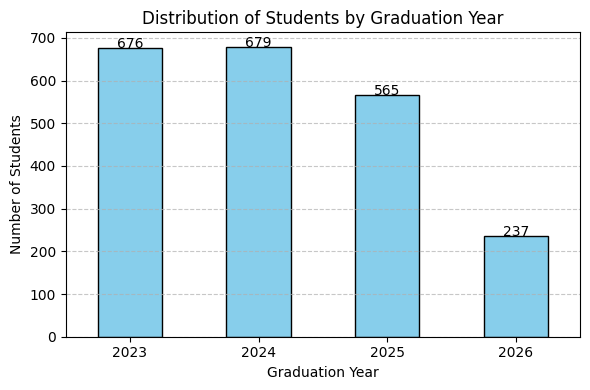

In [ ]:
import matplotlib.pyplot as plt

# Count as Series (for plotting)
grad_year_counts = df_unique['Year of Graduation'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(6,4))
ax = grad_year_counts.plot(kind='bar', color='skyblue', edgecolor='black')
# Add count labels using the existing Series
for i, value in enumerate(grad_year_counts.values):
    ax.text(i, value, str(value), ha='center')

plt.title('Distribution of Students by Graduation Year')
plt.xlabel('Graduation Year')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##Q4) What is the distribution of students' experience with Python programming?

In [ ]:
python_exp = df_unique['Experience with python (Months)']

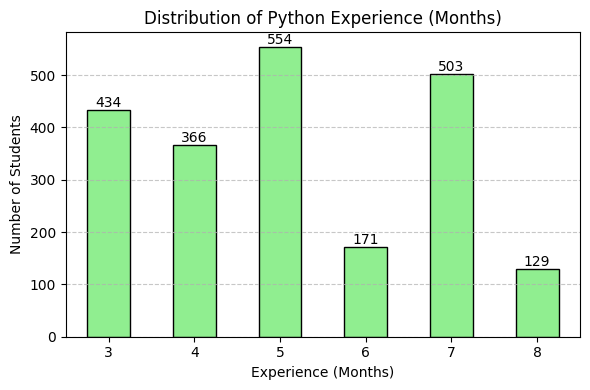

Average Python Experience: 5.2 months


In [ ]:
exp_counts = python_exp.value_counts().sort_index()

plt.figure(figsize=(6,4))
ax = exp_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Distribution of Python Experience (Months)')
plt.xlabel('Experience (Months)')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for i, val in enumerate(exp_counts):
    ax.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Calculate the average experience
avg_exp = python_exp.mean()
print(f'Average Python Experience: {avg_exp:.1f} months')

##Q5) What is the average family income of the students?

In [ ]:
print(df_unique['Family Income'].value_counts().sort_index())

Family Income
0-2 Lakh    2000
2-5 Lakh      85
5-7 Lakh      31
7 Lakh+       41
Name: count, dtype: int64


In [ ]:
most_common_range = df_unique['Family Income'].mode()[0]
print(f"Most Common Income Range: {most_common_range}")

Most Common Income Range: 0-2 Lakh


In [25]:
# Define mapping for income ranges to approximate rupee values
income_mapping = {
    '0-2 Lakh': 100000,
    '2-5 Lakh': 350000,
    '5-7 Lakh': 600000,
    '7 Lakh+': 800000
}

# Map to numeric values
df_unique['Family Income (Numeric)'] = df_unique['Family Income'].map(income_mapping)

# Calculate average
average_income = df_unique['Family Income (Numeric)'].mean()
print(f"Average Family Income (Estimated): ₹{average_income:.2f}")

print("(Range: 0-2 lakh)")
print('\n')

Average Family Income (Estimated): ₹130343.07
(Range: 0-2 lakh)




<ipython-input-25-2019754926>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Family Income (Numeric)'] = df_unique['Family Income'].map(income_mapping)


##Q6) How does the GPA vary among different colleges? (Show top 5 results only)

In [26]:
# Top 5 colleges by average CGPA
top5_df = (
    df_unique.assign(CGPA=pd.to_numeric(df_unique['CGPA'], errors='coerce'))
    .groupby('College Name')['CGPA']
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .reset_index(name='Average CGPA')
    .rename(columns={'College Name': 'College'})
)

print(top5_df)

                                             College  Average CGPA
0                               St Xavier's College       8.795000
1  New horizon institute of Technology and Manage...      8.611765
2  B. K. Birla College of Arts, Science & Commerc...      8.566667
3                   AP SHAH INSTITUTE OF TECHNOLOGY       8.360000
4  THAKUR INSTITUTE OF MANAGEMENT STUDIES, CAREER...      8.325000


In [29]:
# Shorten college names and compute CGPA stats
top5_stats = (
    df_unique.groupby('College Name')['CGPA']
    .agg(['mean', 'median', 'std', 'min', 'max'])
    .rename(columns={'mean': 'Mean', 'median': 'Median', 'std': 'StdDev', 'min': 'Minimum', 'max': 'Maximum'})
    .pipe(lambda df: df.set_index(df.index.map(lambda name: name if len(name) <= 15 else name[:15] + "...")))
    .sort_values(by='Mean', ascending=False)
    .head(5)
)

print(top5_stats.to_string())

                        Mean  Median    StdDev  Minimum  Maximum
College Name                                                    
St Xavier's Col...  8.795000    9.10  0.810117      7.3      9.9
New horizon ins...  8.611765    8.60  0.779329      6.7      9.6
B. K. Birla Col...  8.566667    8.90  1.111797      6.6      9.9
AP SHAH INSTITU...  8.360000    8.20  0.646529      7.7      9.3
THAKUR INSTITUT...  8.325000    8.25  1.265758      6.5      9.9


##Q7) Are there any outliers in the ‘Attending Status’ or ‘Quantity (Number of Courses Completed)’ attributes?

In [30]:
# View unique values and counts in Attending Status
print(df_unique['Attendee Status'].value_counts(dropna=False))

#No categorical outliers are present. But there are 5 missing values.

Attendee Status
Attending    2152
NAN             5
Name: count, dtype: int64


<ipython-input-10-1c5e64e45eda>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Quantity'] = pd.to_numeric(df_unique['Quantity'], errors='coerce')


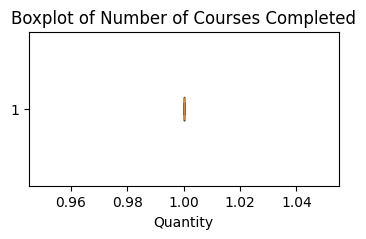

In [ ]:
#Quantity (expecting some varied entries)
import matplotlib.pyplot as plt

# Ensure 'Quantity' is numeric
df_unique['Quantity'] = pd.to_numeric(df_unique['Quantity'], errors='coerce')

# Boxplot
plt.figure(figsize=(4, 2))
plt.boxplot(df_unique['Quantity'].dropna(), vert=False)
plt.title('Boxplot of Number of Courses Completed')
plt.xlabel('Quantity')
plt.show()

In [35]:
#checking if this also has only 1 entry
print("Number of entries in 'Quantity':", df_unique['Quantity'].count())
print(df_unique['Quantity'].map(lambda x: '1' if x == 1 else 'Others').value_counts())

Number of entries in 'Quantity': 2157
Quantity
1    2157
Name: count, dtype: int64


Upon examining the 'Attendee Status' and 'Quantity' attributes, we found no outliers in either column. 'Attendee Status' is clean apart from 5 missing values, and 'Quantity' values are tightly distributed with no statistical outliers, as confirmed by boxplot.

##Q8) What is the average GPA of students from each city?

In [40]:
# Compute average CGPA and student count per city
city_stats = (
    df_unique.assign(CGPA=pd.to_numeric(df_unique['CGPA'], errors='coerce'))
    .groupby('City')['CGPA']
    .agg(['mean', 'count'])
    .rename(columns={'mean': 'Average CGPA', 'count': 'Student Count'})
)

# Top 5 cities by average CGPA
top5 = city_stats.sort_values(by='Average CGPA', ascending=False).reset_index()
print("\nTop 5 Cities by Average GPA:")
print(top5.head(5))

# Bottom 5 cities by average CGPA
bottom5 = city_stats.sort_values(by='Average CGPA').reset_index()
print("\nBottom 5 Cities by Average GPA:")
print(bottom5.head(5))


Top 5 Cities by Average GPA:
      City  Average CGPA  Student Count
0    Delhi      9.014286              7
1   Raipur      8.980000              5
2  Sonipat      8.712500              8
3   konark      8.540000              5
4   Karnal      8.533333              6

Bottom 5 Cities by Average GPA:
        City  Average CGPA  Student Count
0      Vasai      7.100000              6
1      Daman      7.114286              7
2  New Delhi      7.142857              7
3  Darbhanga      7.300000              4
4       Dhar      7.312500              8


In [ ]:
# Save the city-wise GPA and student count table to CSV
city_stats.to_csv('city_gpa_summary.csv', index=False)

print("City GPA summary saved as 'city_gpa_summary.csv'")

City GPA summary saved as 'city_gpa_summary.csv'


In [ ]:
# download link
files.download('city_gpa_summary.csv')
print('Downloaded.')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded.


# **Moderate Questions**

##Q10) How does the expected salary vary based on factors such as GPA, family income, and Python programming experience?

In [ ]:
# Checking correlation
cols = ['Expected salary (Lac)', 'CGPA', 'Family Income (Numeric)', 'Experience with python (Months)']
df_unique[cols].corr().style.background_gradient(cmap='coolwarm').format("{:.3f}")

,Expected salary (Lac),CGPA,Family Income (Numeric),Experience with python (Months)
Expected salary (Lac),1.000,0.178,0.053,0.105
CGPA,0.178,1.000,0.018,-0.008
Family Income (Numeric),0.053,0.018,1.000,0.035
Experience with python (Months),0.105,-0.008,0.035,1.000


#####🔴 Strong positive correlation = Red
#####🔵 Strong negative correlation = Blue
#####⚪ Near zero (no correlation) = White
##### GPA and Python experience show some weak positive influence on expected salary — meaning students with slightly better GPA or more Python experience tend to expect higher salaries.
##### Family income has almost no influence on expected salary expectations — possibly because students don't directly link family wealth to career salary.

##Q11) Which event tend to attract more students from specific fields of study?

In [ ]:
# Count number of students per event
event_counts = df_unique['Events'].value_counts()
print(event_counts)

Events
Internship Program(IP) Success Conclave        657
Art of Resume Building                         336
Hello ML and DL                                233
Data Visualization using Power BI              225
Talk on Skill and Employability Enhancement    194
IAC - Q&A                                      146
Product Marketing                              112
Skill and Employability Enhancement             87
The Agile Ways of Working                       73
Artificial Intelligence                         62
The SDLC & their transformations                32
Name: count, dtype: int64


##### 'Internship Program(IP) Success Conclave' clearly sttracted the most number of students

 Events Grouped by Field of Study:

 #### Career Development & Employability
- Internship Program (IP) Success Conclave
- Art of Resume Building
- Talk on Skill and Employability Enhancement
- Skill and Employability Enhancement
- IAC - Q&A

#### Data Science & Analytics
- Hello ML and DL
- Data Visualization using Power BI

#### Business & Management
- Product Marketing
- The Agile Ways of Working

#### Technology & Software
- Artificial Intelligence
- The SDLC & their transformations


In [10]:
# Mapping of events to fields of study
event_to_field = {
    "Internship Program(IP) Success Conclave": "Career Development",
    "Art of Resume Building": "Career Development",
    "Talk on Skill and Employability Enhancement": "Career Development",
    "Skill and Employability Enhancement": "Career Development",
    "IAC - Q&A": "Career Development",

    "Hello ML and DL": "Data Science",
    "Data Visualization using Power BI": "Data Science",

    "Product Marketing": "Business & Management",
    "The Agile Ways of Working": "Business & Management",

    "Artificial Intelligence": "Tech & Engineering",
    "The SDLC & their transformations": "Tech & Engineering"
}

In [9]:
# Count students per field based on event mapping
field_counts = (
    df_unique['Events']
    .map(event_to_field)
    .value_counts()
    .sort_values(ascending=False)
)

print(field_counts)

Events
Career Development       1420
Data Science              458
Business & Management     185
Tech & Engineering         94
Name: count, dtype: int64


#### So clearly 'Career Development' attracts the higest number of students. (It also has the highest number of events conducted.)

##Q12) Do students in leadership roles during college tend to have higher GPAs or higher salary expectations?

In [41]:
# Strip spaces and convert to lowercase for consistency
df_unique['Leadership- skills'] = df_unique['Leadership- skills'].str.strip().str.lower()

# Check unique values again
print(df_unique['Leadership- skills'].value_counts())
print('\n')

Leadership- skills
no     1453
yes     704
Name: count, dtype: int64




<ipython-input-41-1276316429>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Leadership- skills'] = df_unique['Leadership- skills'].str.strip().str.lower()


In [ ]:
#calculating group-wise means.
group_means = df_unique.groupby('Leadership- skills')[['CGPA', 'Expected salary (Lac)']].mean()
print(group_means)

                        CGPA  Expected salary (Lac)
Leadership- skills                                 
no                  8.035719              13.753613
yes                 8.012784              13.754261


What this suggests:

Based on averages alone, students in leadership roles do not have notably higher CGPAs or expected salaries compared to others.
The differences are very small, almost negligible.

In [ ]:
#Run the t-tests to see if these tiny differences are statistically significant or just noise:
from scipy.stats import ttest_ind

leaders = df_unique[df_unique['Leadership- skills'] == 'yes']
non_leaders = df_unique[df_unique['Leadership- skills'] == 'no']

gpa_test = ttest_ind(leaders['CGPA'].dropna(), non_leaders['CGPA'].dropna())
salary_test = ttest_ind(leaders['Expected salary (Lac)'].dropna(), non_leaders['Expected salary (Lac)'].dropna())

print(f"CGPA t-test p-value: {gpa_test.pvalue:.4f}")
print(f"Expected Salary t-test p-value: {salary_test.pvalue:.4f}")

CGPA t-test p-value: 0.6175
Expected Salary t-test p-value: 0.9982


Since both p-values are much greater than 0.05, the differences in CGPA and expected salary between leaders and non-leaders are not statistically significant.


##Q13) Is there a correlation between leadership skills and expected salary among the students?

In [43]:
#Convert Leadership to numeric (e.g., Yes = 1, No = 0)
df_unique['Leadership_numeric'] = df_unique['Leadership- skills'].map({'yes': 1, 'no': 0})

#Computing correlation
correlation = df_unique[['Leadership_numeric', 'Expected salary (Lac)']].corr()
print(correlation)
print('\n')

                       Leadership_numeric  Expected salary (Lac)
Leadership_numeric               1.000000               0.000048
Expected salary (Lac)            0.000048               1.000000




<ipython-input-43-621498731>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Leadership_numeric'] = df_unique['Leadership- skills'].map({'yes': 1, 'no': 0})


Correlation coefficient = 0.000048

This is almost exactly zero, meaning:
There is no correlation between leadership skills and expected salary of students in your dataset.

##Q14) How many students are expected to graduate by the end of 2024?

In [ ]:
# Filter for year 2024
grad_2024_count = df_unique[df_unique['Year of Graduation'] == 2024].shape[0]
print(f"Number of students graduating at the end of 2024: {grad_2024_count}")

Number of students graduating at the end of 2024: 679


##Q16) Find total number of students who attended the events related to Data Science (From all Data Science related Courses)

Have used the previous classification of events into different field (from Q11 since there are no column named courses or anything related)

Data Science
- Hello ML and DL
- Data Visualization using Power BI

In [15]:
# Map events to field
df_unique['Field of Study'] = df_unique['Events'].map(event_to_field)

# Filter only Data Science events
ds_students = df_unique[df_unique['Field of Study'] == 'Data Science']

# Print total count
print("Total students in Data Science events:", len(ds_students))
print('\n')

Total students in Data Science events: 458




<ipython-input-15-64067063>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Field of Study'] = df_unique['Events'].map(event_to_field)


##Q17) Those who have high CGPA and & more experience in language, do they have high expectation for salary(Avg)?

In [20]:
# Calculate thresholds using mean
cgpa_threshold = df_unique['CGPA'].mean()
exp_threshold = df_unique['Experience with python (Months)'].mean()

print(f"CGPA threshold (mean): {cgpa_threshold:.2f}")
print(f"Experience threshold (mean): {exp_threshold:.2f}")

CGPA threshold (mean): 8.03
Experience threshold (mean): 5.15


In [21]:
# Filter based on data-driven thresholds
high_perf = df_unique[
    (df_unique['CGPA'] >= cgpa_threshold) &
    (df_unique['Experience with python (Months)'] >= exp_threshold)
]
low_perf = df_unique[~df_unique.index.isin(high_perf.index)]

In [22]:
# Average expected salary
avg_high = high_perf['Expected salary (Lac)'].mean()
avg_rest = low_perf['Expected salary (Lac)'].mean()
##This gives us the typical salary expectation for "high-performing" students and the rest of the students.

print(f"Avg expected salary (with high CGPA & experience): {avg_high:.2f} Lakh")
print(f"Avg expected salary (others): {avg_rest:.2f} Lakh")

Avg expected salary (with high CGPA & experience): 16.47 Lakh
Avg expected salary (others): 13.20 Lakh


So the answer is yes — students who have high CGPA and more experience in Python tend to have a higher average expected salary.

##Q18) How many students know about the event from their colleges? Which of these top 5 colleges?

In [23]:
# Filter students who mentioned 'college' in either column
college_promo = df_unique[
    df_unique['How did you come to know about this event?'].str.contains('college', case=False, na=False) |
    df_unique['Specify in "Others" (how did you come to know about this event)'].str.contains('college', case=False, na=False)
]

print(f"Number of students who heard from their college: {len(college_promo)}")

Number of students who heard from their college: 113


In [44]:
print(college_promo['College Name'].value_counts().head(5))

College Name
GOVERNMENT POLYTECHNIC GANDHINAGAR                       6
Wilson college                                           6
ld college of engineering, ahmedabad, gujarat            6
wilson college                                           5
kle society's college of bca, rls institute, belagavi    5
Name: count, dtype: int64
